## Importing Dependancies

In [1]:
import sys
import lightkurve as lk, matplotlib.pyplot as plt, numpy as np
from pathlib import Path
from astropy import units as u

sys.path.append('../')
from Functions.queryLightcurve import loadlc

## Target files

Input the files you want to generated light curves for here. Can include a partial match.

In [2]:
targets = [
    '../../Data/*_lc.fits'
]

## Generating lightcurve
Code that generates the light curves is here.

/home/noah/miniconda3/envs/mPhysPrj/lib/python3.13/site-packages/lightkurve/lightcurve.py:1987: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1)


['TIC 72782654', 'TIC 279741942', 'TIC 77545160', 'TIC 53708889', 'TIC 261656371', 'TIC 129409890', 'TIC 297899564', 'TIC 99813351', 'TIC 398850090', 'TIC 175969976', 'TIC 288434781', 'TIC 184008771', 'TIC 299903137', 'TIC 331532483', 'TIC 179410793', 'TIC 291385340', 'TIC 139699256', 'TIC 286310830', 'TIC 118313102', 'TIC 39576803', 'TIC 22818693', 'TIC 176551075', 'TIC 287321618', 'TIC 261136311']


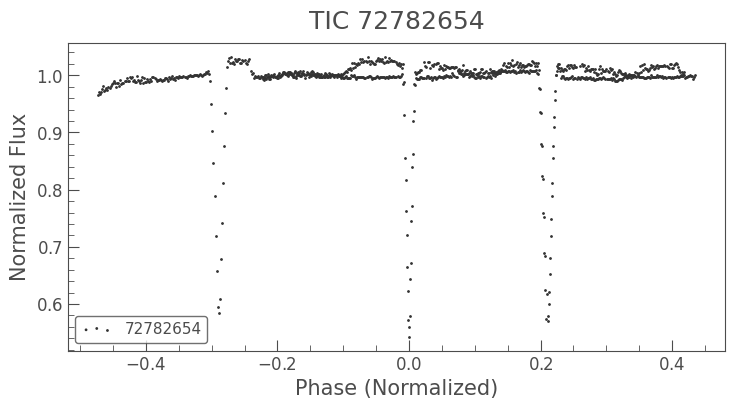

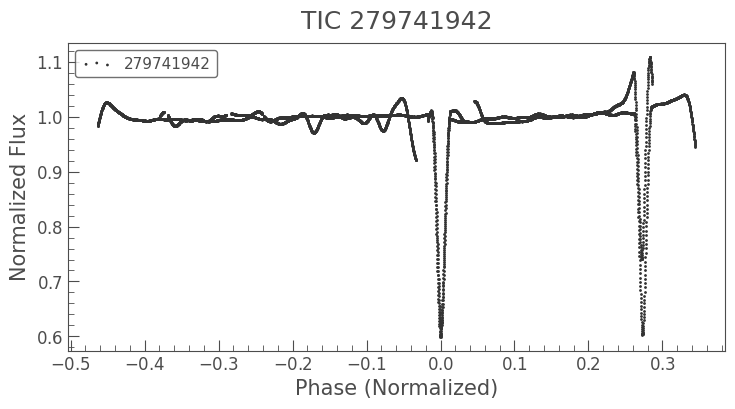

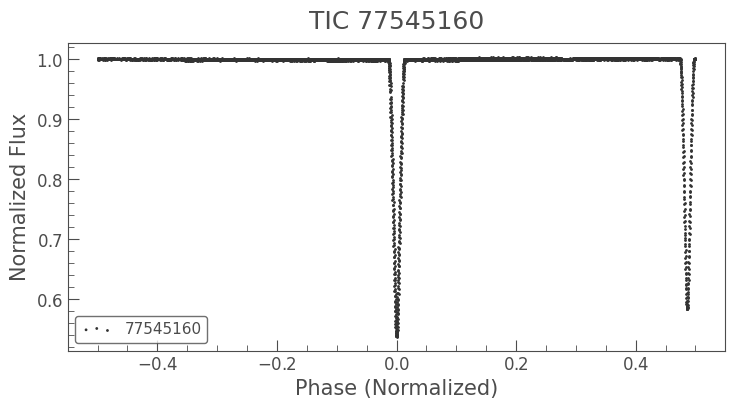

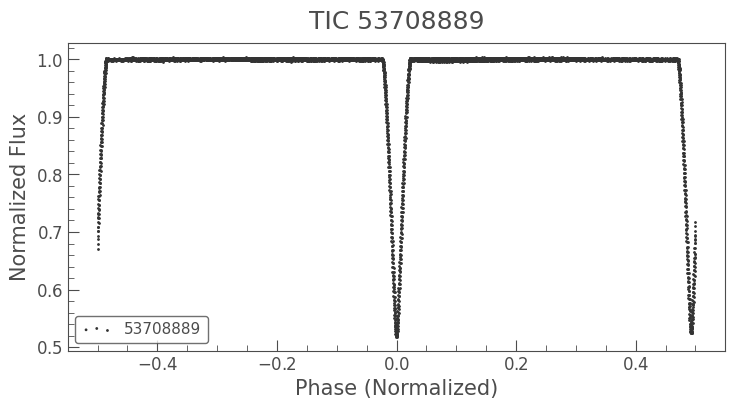

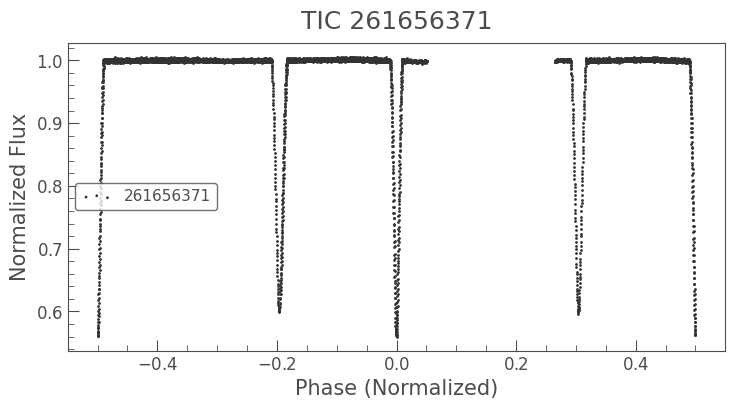

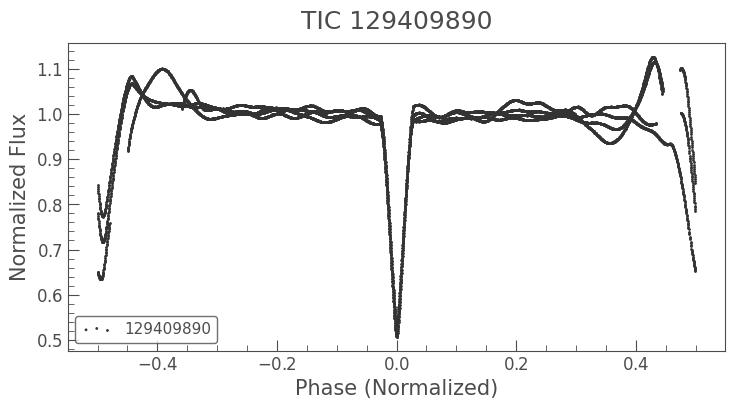

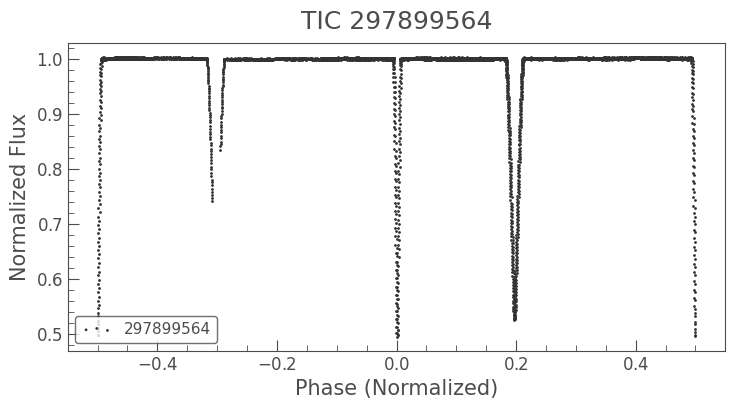

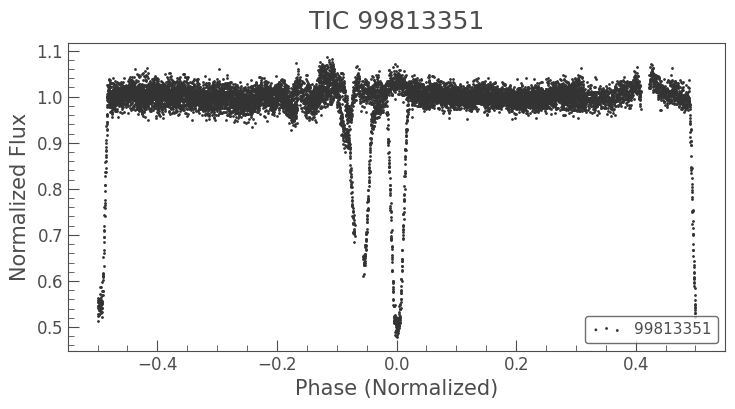

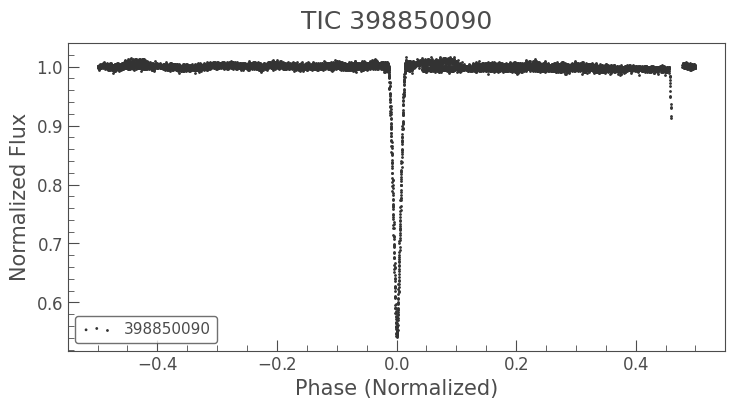

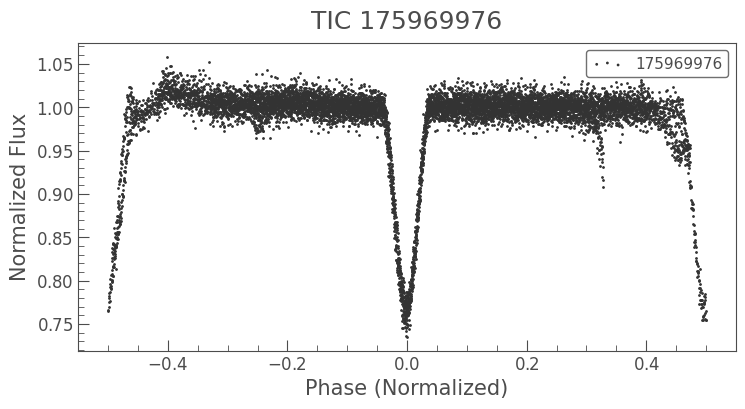

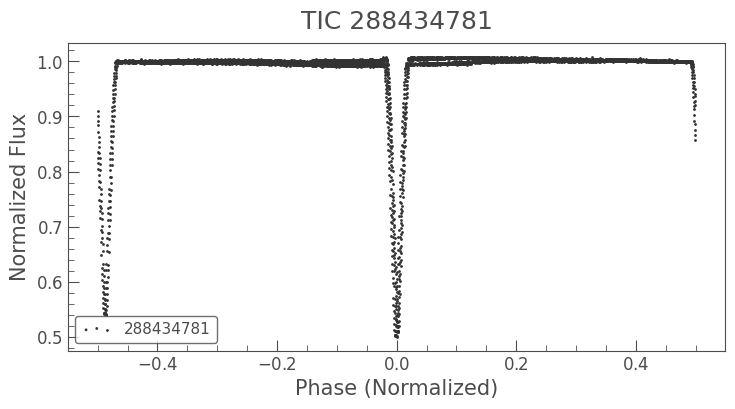

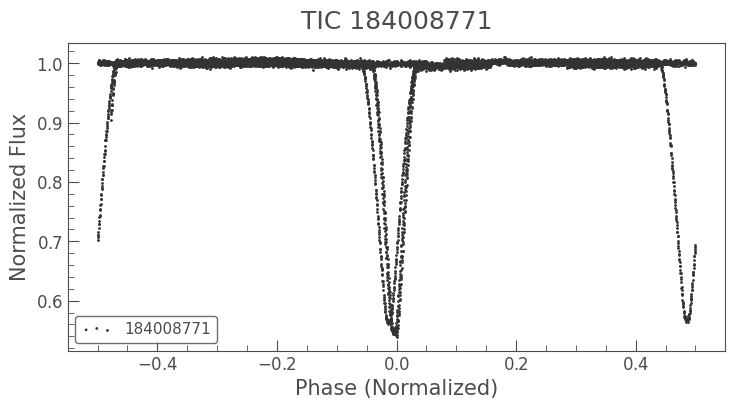

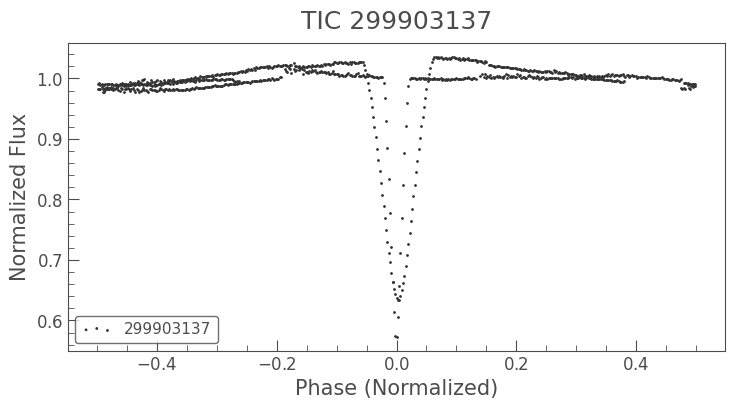

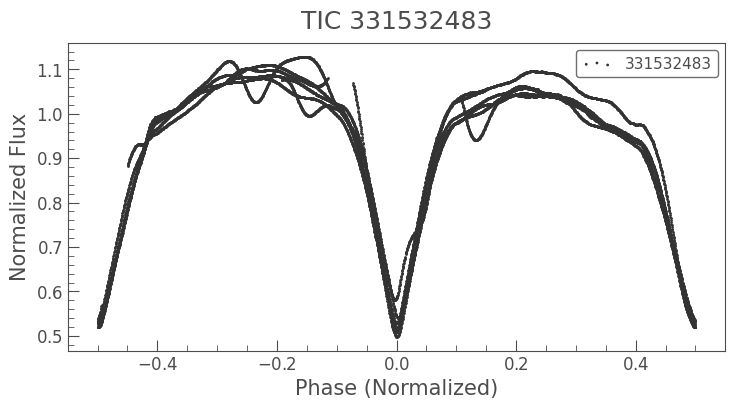

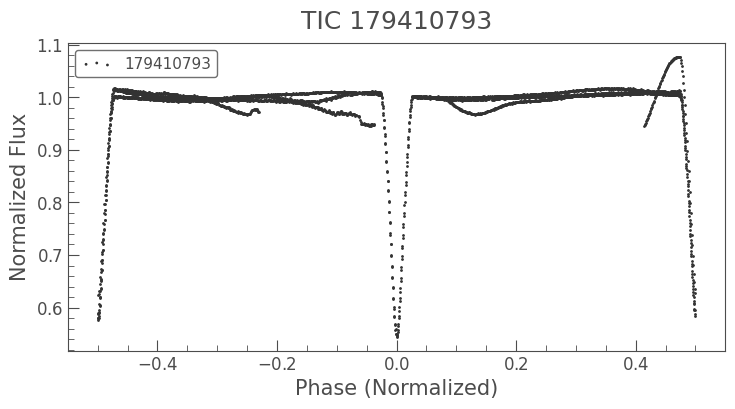

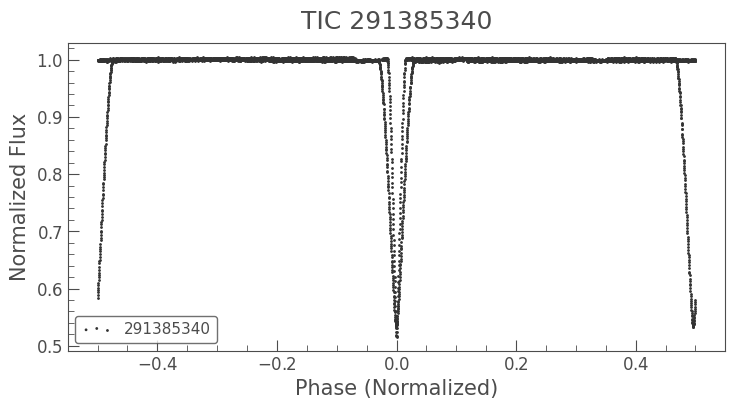

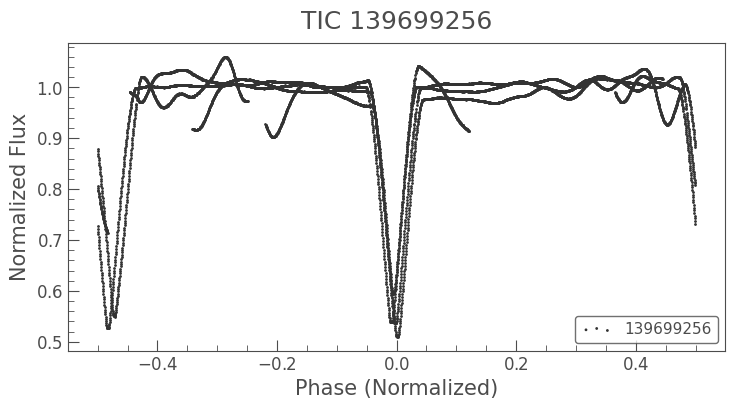

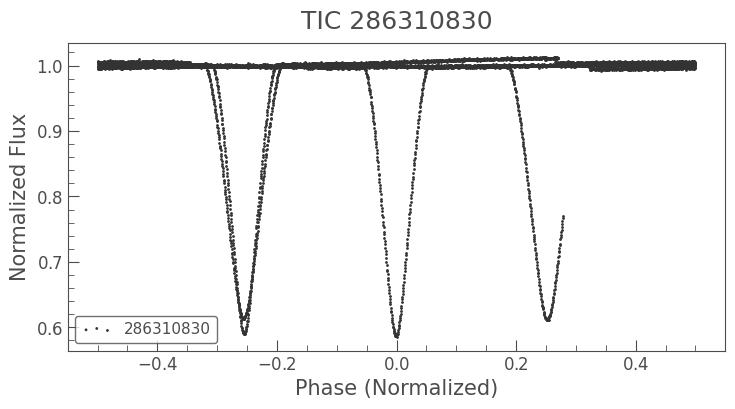

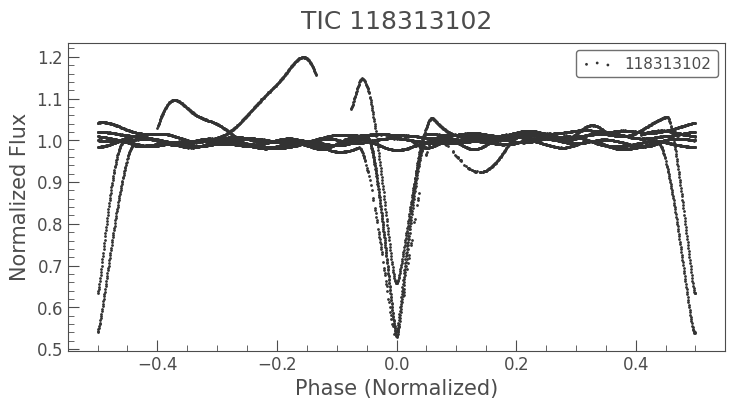

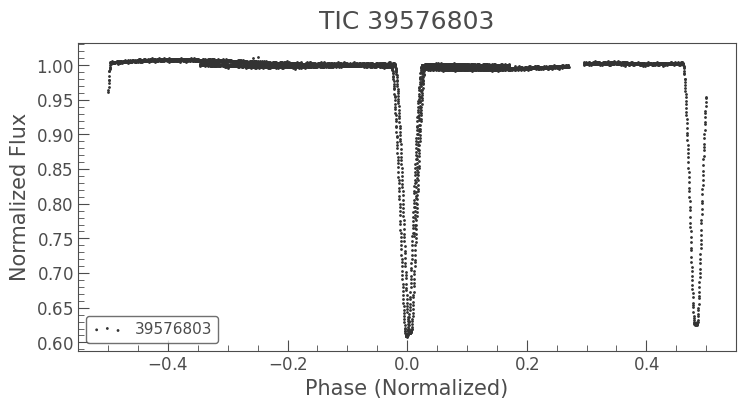

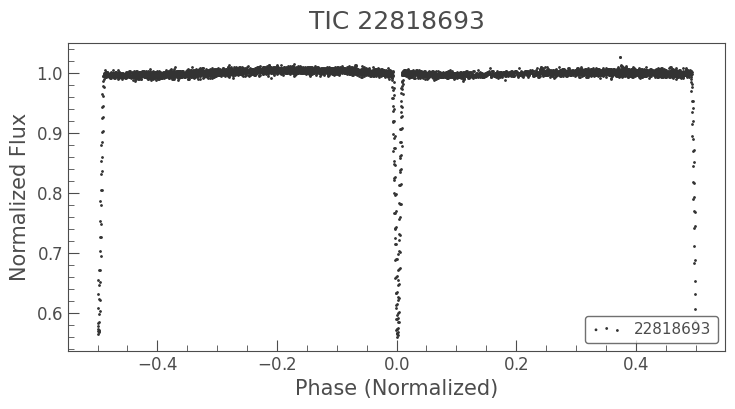

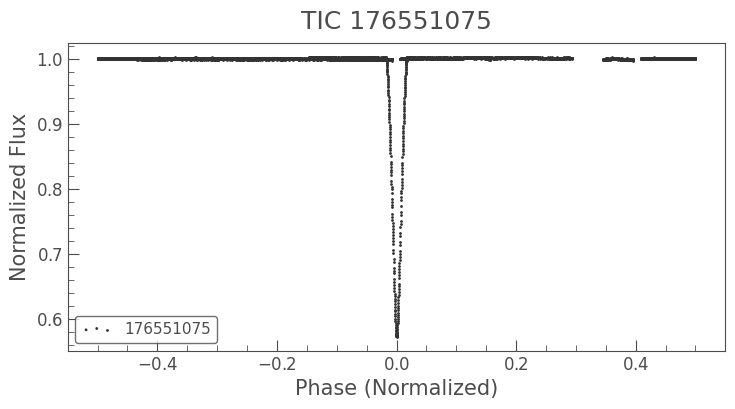

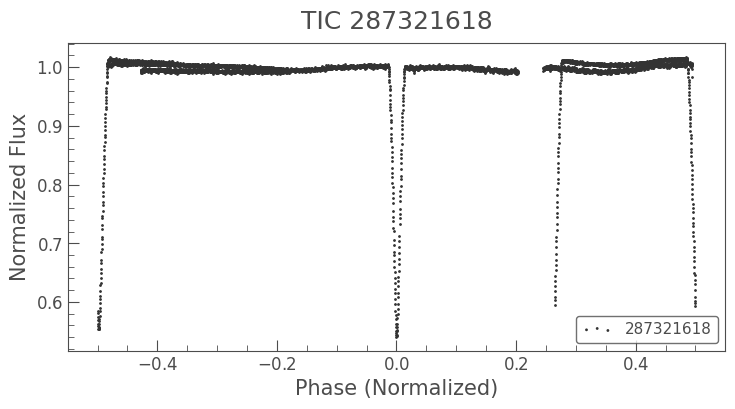

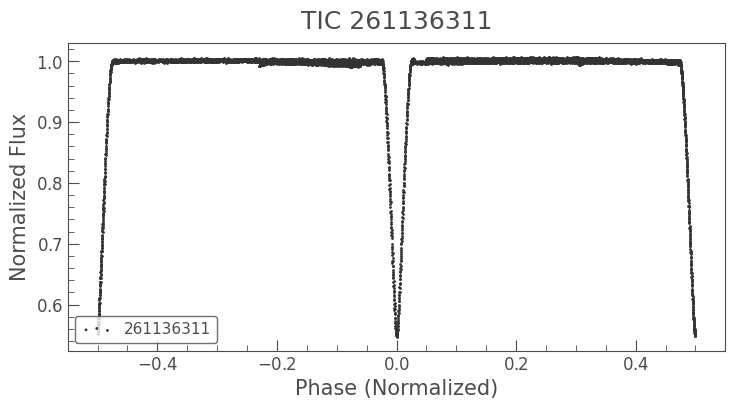

In [3]:
# Retrieve files to be loaded

files = []
for target in targets:
    path = Path(target)
    directory = path.parent
    glob = path.name
    files.extend(list(directory.glob(glob)))

# Generate lc
figs = []
names = []

for file in files:
    lc = loadlc(str(file))
    pdgram = lc.to_periodogram(method='bls')
    period = pdgram.period_at_max_power * 2 # This might be a problem
    t0 = lc.time[np.argmin(lc.flux)]
    phase_curv = lc.fold(period=period, epoch_time=t0, normalize_phase=True).normalize()
    figs.append(phase_curv.scatter(title=file.name[:-8]))
    names.append(file.name[:-8])

print(names)
plt.show()